In [1]:
%matplotlib inline
import pandas as pd
import utils

# Load Data

In [2]:
data = utils.get_socrata_data("http://data.cityofchicago.org/resource/uahe-iimk.json")
rentals = pd.DataFrame(data)

Got http://data.cityofchicago.org/resource/uahe-iimk.json?%24offset=0&%24limit=50000
Writing uahe-iimk.json?%24offset=0&%24limit=50000


# Analysis

In [3]:
rentals.head(15)

,address,community_area,community_area_number,latitude,location,longitude,management_company,phone_number,property_name,property_type,units,x_coordinate,y_coordinate,zip_code
0,60th/Halsted,Englewood,68,NaN,NaN,NaN,Voluinteers of America Illinois,773-874-3610,Hope Manor II Apartments,Supportive/Veterans,73,NaN,NaN,60621
1,44th/Indiana,Grand Boulevard,38,NaN,NaN,NaN,Indiana Manor Townhomes,773-268-5326,Indiana Manor Town Homes,Multifamily,87,NaN,NaN,60653
2,41st St. - 44th St.,Grand Boulevard,38,NaN,NaN,NaN,Bonheur Realty Services Corp.,773-538-3800,Hearts United Phase I - The Langston,Multifamily,65,NaN,NaN,60653
3,E. Evans - W. Vincennes,Grand Boulevard,38,NaN,NaN,NaN,Bonheur Realty Services Corp.,773-538-3800,Hearts United Phase II - The Quincy,Multifamily,116,NaN,NaN,60653
4,3200 block of West Douglas Blvd.,North Lawndale,29,NaN,NaN,NaN,Holsten Management Corp.,312-337-5339,Lawndale Restoration II Apartments,Multifamily,45,NaN,NaN,60613
5,Ogden/California/Talman,North Lawndale,29,NaN,NaN,NaN,Interstate Realty Management Co.,773-893-4800,Park Douglas,Multifamily,54,NaN,NaN,60608
6,37th/Ellis,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 1A,Multifamily,40,NaN,NaN,60653
7,37th/Cottage,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 1B,Multifamily,163,NaN,NaN,60653
8,37th/Langley,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 2A,Multifamily,162,NaN,NaN,60653
9,38th/Vincennes,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 2B 1,Multifamily,199,NaN,NaN,60653


In [4]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
address                  263 non-null object
community_area           263 non-null object
community_area_number    260 non-null object
latitude                 253 non-null object
location                 253 non-null object
longitude                253 non-null object
management_company       263 non-null object
phone_number             263 non-null object
property_name            263 non-null object
property_type            263 non-null object
units                    263 non-null object
x_coordinate             253 non-null object
y_coordinate             253 non-null object
zip_code                 263 non-null object
dtypes: object(14)
memory usage: 28.8+ KB


In [5]:
rentals.property_type.value_counts().reset_index()

,index,property_type
0,Multifamily,135
1,Senior,76
2,Supportive Housing,22
3,Senior HUD 202,6
4,ARO,5
5,People with Disabilities,3
6,Supportive,2
7,Supportive/Veterans,2
8,Supportive/Teenage Moms,1
9,Supportive/Males 18-24yrs.,1


In [6]:
rentals.units.describe()

count     263
unique    123
top        60
freq        9
Name: units, dtype: object

In [7]:
rentals["units_num"] = pd.to_numeric(rentals["units"], errors="coerce")

In [8]:
rentals.units_num.sum()

19189

In [9]:
rentals.units_num.mean()

72.961977186311785

In [10]:
rentals.units_num.max()

317

In [11]:
rentals.community_area.value_counts().reset_index()

,index,community_area
0,Humboldt Park,18
1,Grand Boulevard,17
2,North Lawndale,14
3,Uptown,13
4,Woodlawn,12
5,Douglas,11
6,Austin,11
7,Near West Side,11
8,East Garfield Park,10
9,Washington Park,10


In [12]:
multifamily = rentals[rentals.property_type == 'Multifamily']

In [13]:
multifamily.community_area.value_counts().reset_index()

,index,community_area
0,Humboldt Park,13
1,Grand Boulevard,11
2,Woodlawn,11
3,North Lawndale,9
4,Douglas,9
5,Near West Side,8
6,Uptown,7
7,Lower West Side,7
8,West Town,6
9,East Garfield Park,6


In [14]:
rentals.management_company.value_counts().reset_index()

,index,management_company
0,Senior Lifestyle Corp.,19
1,"Urban Property Advisors, LLC",17
2,Bickerdike Apartments,14
3,The Resurrection Project,9
4,Interstate Realty Management Co.,8
5,Mercy Housing,8
6,Holsten Real Estate Dev. Corp.,7
7,Hispanic Housing Dev. Corp.,7
8,Holsten Management Corp.,6
9,Interfaith Housing Corp.,6


In [15]:
humboldt = rentals[rentals.community_area == 'Humboldt Park']

In [16]:
humboldt.property_type.value_counts().reset_index()

,index,property_type
0,Multifamily,13
1,Supportive Housing,2
2,Supportive/Males 18-24yrs.,1
3,Senior,1
4,Supportive/Veterans,1


In [17]:
rentals.address.value_counts().reset_index()

,index,address
0,2822 W. Jackson Blvd.,2
1,6928 N. Wayne Ave.,2
2,1129 S. Sacramento Ave.,2
3,3541 W. North Ave.,2
4,1311 N. Halsted St.,2
5,2626 W. 63rd St.,2
6,30 W. Cermak Road,2
7,5801 N. Pulaski Road,2
8,400 E. 41st St.,2
9,2014 S. Racine Ave.,2


In [18]:
rentals.zip_code.value_counts().reset_index()

,index,zip_code
0,60653,26
1,60624,19
2,60637,18
3,60609,16
4,60647,15
5,60608,14
6,60612,14
7,60640,11
8,60628,10
9,60644,9


In [19]:
rentals[rentals.zip_code == "60653"]

,address,community_area,community_area_number,latitude,location,longitude,management_company,phone_number,property_name,property_type,units,x_coordinate,y_coordinate,zip_code,units_num
1,44th/Indiana,Grand Boulevard,38,NaN,NaN,NaN,Indiana Manor Townhomes,773-268-5326,Indiana Manor Town Homes,Multifamily,87,NaN,NaN,60653,87
2,41st St. - 44th St.,Grand Boulevard,38,NaN,NaN,NaN,Bonheur Realty Services Corp.,773-538-3800,Hearts United Phase I - The Langston,Multifamily,65,NaN,NaN,60653,65
3,E. Evans - W. Vincennes,Grand Boulevard,38,NaN,NaN,NaN,Bonheur Realty Services Corp.,773-538-3800,Hearts United Phase II - The Quincy,Multifamily,116,NaN,NaN,60653,116
6,37th/Ellis,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 1A,Multifamily,40,NaN,NaN,60653,40
7,37th/Cottage,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 1B,Multifamily,163,NaN,NaN,60653,163
8,37th/Langley,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 2A,Multifamily,162,NaN,NaN,60653,162
9,38th/Vincennes,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 2B 1,Multifamily,199,NaN,NaN,60653,199
15,837 E. 47th St.,Kenwood,39,41.8094408765,"{u'type': u'Point', u'coordinates': [-87.60503...",-87.6050334227,MLG Management,773-624-4901,Drexel Preservation,Multifamily,39,1182801.3254214067,1873991.9476500086,60653,39
16,223 E. 41st St.,Grand Boulevard,38,41.820074554,"{u'type': u'Point', u'coordinates': [-87.62042...",-87.6204232972,Interstate Realty Management Co.,773-268-0202,Legends South - Coleman Place,Multifamily,110,1178573.5197471243,1877831.6285598048,60653,110
32,5947 S. Indiana Ave.,Washington Park,40,41.7860493567,"{u'type': u'Point', u'coordinates': [-87.62047...",-87.6204757369,St. Edmund's Manor Ltd.,773-548-8924,St. Edmund's Manor,Multifamily,24,1178662.0563776551,1865432.9159510299,60653,24


#### This zip code has nearly double the unemployment level of the rest of Chicago according to the Tribune

In [20]:
zip = rentals[rentals.zip_code == '60653']

In [21]:
zip.property_type.value_counts().reset_index()

,index,property_type
0,Multifamily,19
1,Senior,5
2,Artist Live/Work Space,1
3,Senior HUD 202,1


In [22]:
zip.units_num.sum()

2400

#### Roughly 1 in 8 affordable rentals are in this zip code

In [23]:
zip.management_company.value_counts().reset_index()

,index,management_company
0,"The Community Builders, Inc.",6
1,Bonheur Realty Services Corp.,2
2,Peoples Co-Op Management Service,2
3,Interstate Realty Management Co.,2
4,Pioneer Gardens Senior Housing,1
5,Michigan Plaza LP,1
6,Indiana Manor Townhomes,1
7,"Draper and Kramer, Inc.",1
8,St. Edmund's Manor Ltd.,1
9,Paul G. Stewart Assoc.,1


In [25]:
rentals[rentals.management_company == "The Community Builders, Inc."]

,address,community_area,community_area_number,latitude,location,longitude,management_company,phone_number,property_name,property_type,units,x_coordinate,y_coordinate,zip_code,units_num
6,37th/Ellis,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 1A,Multifamily,40,NaN,NaN,60653,40
7,37th/Cottage,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 1B,Multifamily,163,NaN,NaN,60653,163
8,37th/Langley,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 2A,Multifamily,162,NaN,NaN,60653,162
9,38th/Vincennes,Oakland,36,NaN,NaN,NaN,"The Community Builders, Inc.",773-373-1300,Oakwood Shores 2B 1,Multifamily,199,NaN,NaN,60653,199
46,3755 S. Cottage Grove Ave.,Oakland,36,41.826317314,"{u'type': u'Point', u'coordinates': [-87.60794...",-87.6079454471,"The Community Builders, Inc.",773-373-1300,Oakwood Shores Terrace,Senior,148,1181955.520136621,1880134.9315073378,60653,148
255,3750 S. Cottage Grove Ave.,Oakland,36,41.8263705668,"{u'type': u'Point', u'coordinates': [-87.60828...",-87.6082867641,"The Community Builders, Inc.",773-373-1300,Oakwood Shores Senior Apartments,Multifamily,75,1181862.3293714053,1880153.551343028,60653,75


In [33]:
rentals["community_area_num"] = pd.to_numeric(rentals["community_area"], errors="coerce")

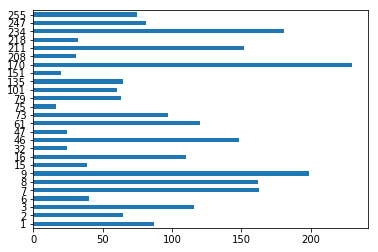

In [37]:
zip.units_num.plot.barh()